In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams["figure.figsize"] = (7, 7)

### Считываем изображение

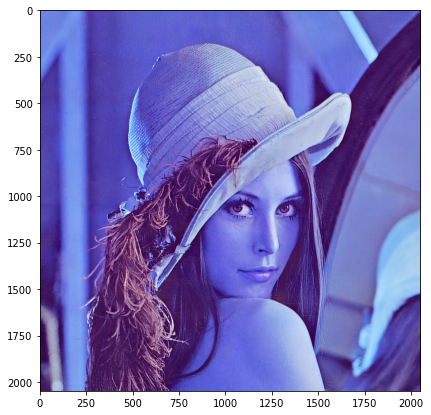

In [3]:
img = cv2.imread('img.png', cv2.IMREAD_COLOR)
# img = cv2.imread('img.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

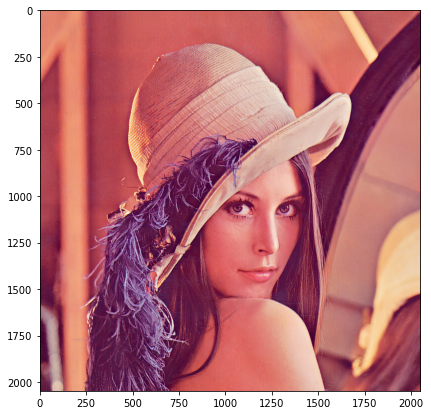

In [4]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# rgb_img = img[...,::-1]
plt.imshow(rgb_img)

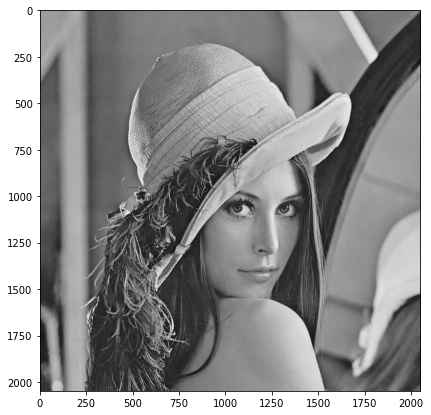

In [5]:
img_gray = cv2.imread('img.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray, cmap='gray') #cv2.imshow()

### Фильтры

In [6]:
img = img[...,::-1]

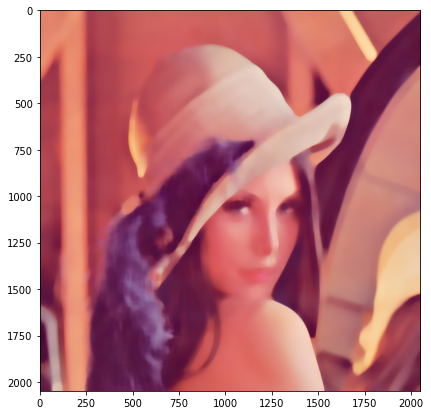

In [7]:
# медианнное размытие
img_blur = cv2.medianBlur(img, 51)
plt.imshow(img_blur)

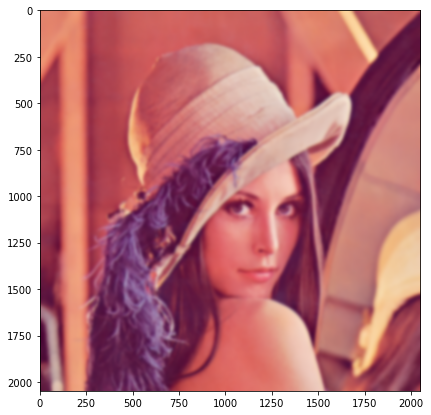

In [8]:
# размытие по Гауссу
blurred = cv2.GaussianBlur(img, (51, 51), 0)
plt.imshow(blurred)

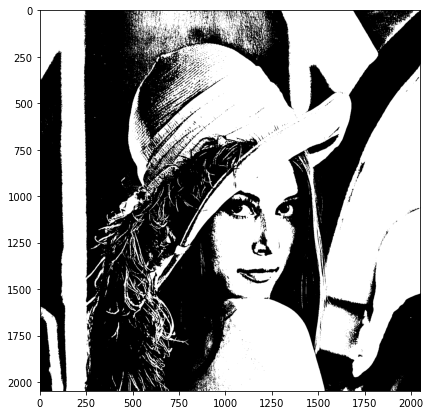

In [9]:
ret, threshold_image = cv2.threshold(img_gray, 127, 255, 0)
plt.imshow(threshold_image, cmap='gray')

In [11]:
x = cv2.Sobel(img_gray, cv2.CV_16S,1,0)  
y = cv2.Sobel(img_gray, cv2.CV_16S,0,1)  
  
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y) 

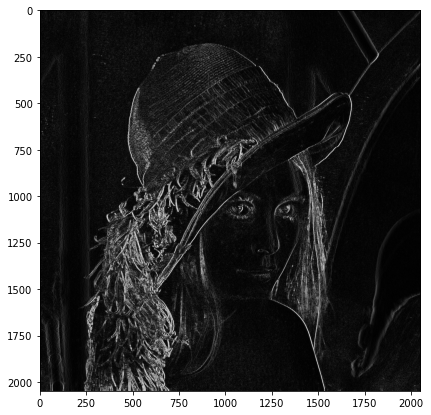

In [12]:
plt.imshow(absX, cmap='gray')

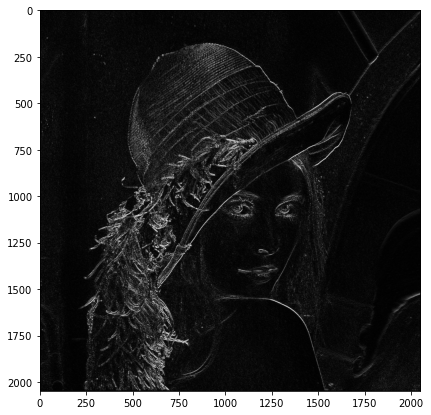

In [13]:
plt.imshow(absY, cmap='gray')

### Поворот изображения

In [14]:
def rotate(image, angle):
    (h, w) = image.shape[:2]

    center = (w / 2, h / 2)

    M = cv2.getRotationMatrix2D(center, angle, scale=1.0)
    rotated = cv2.warpAffine(image, M, (w, h))

    return rotated

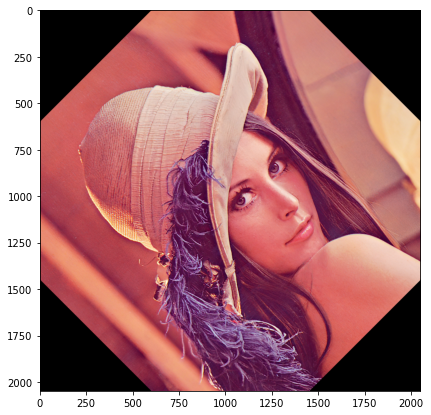

In [15]:
plt.imshow(rotate(img, 45))

### Поиск ключевых точек

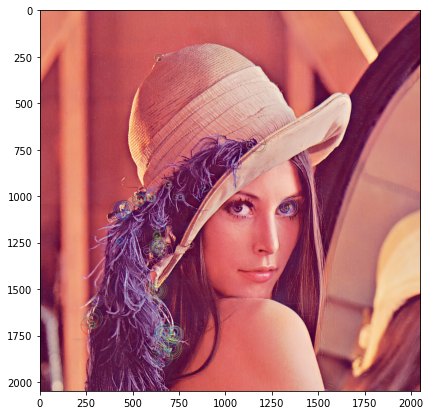

In [16]:
orb = cv2.ORB_create(200)
keypoint, des = orb.detectAndCompute(img, None)
img_final = cv2.drawKeypoints(img, keypoint, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_final)

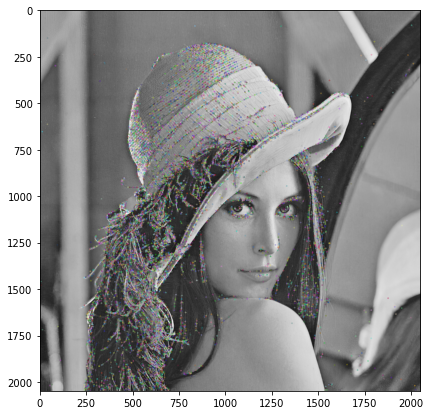

In [17]:
sift = cv2.SIFT_create()
kp_src = sift.detect(img_gray, None)
img_final = cv2.drawKeypoints(img_gray, kp_src, img_gray)
plt.imshow(img_final)

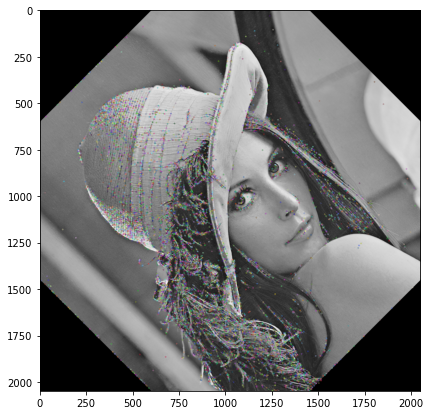

In [18]:
rotate_img = rotate(img_gray, 45)
kp_rotate = sift.detect(rotate_img, None)
img_final_rotate = cv2.drawKeypoints(rotate_img, kp_rotate, rotate_img)
plt.imshow(img_final_rotate)

### Дополнение. Drawing модуль

In [22]:
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)

RED = (0, 0, 255)
GREEN = (0, 255, 0)
BLUE = (255, 0, 0)

CYAN = (255, 255, 0)
MAGENTA = (255, 0, 255)
YELLOW = (0, 255, 255)

p0 = 100, 10
p1 = 200, 90
p2 = 300, 20    
p3 = 450, 80

img = img = np.zeros((100, 500, 3), np.uint8)
cv2.rectangle(img, p0, p1, BLUE, 2)
cv2.rectangle(img, p2, p3, GREEN, cv2.FILLED);

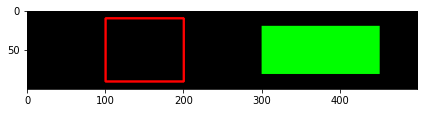

In [23]:
plt.imshow(img)

In [24]:
BLUE = (255, 0, 0)
center = 200, 50
axes = 100, 30
angle = 15

img = np.zeros((100, 500, 3), np.uint8)
cv2.ellipse(img, center, axes, angle, 0, 360, BLUE, 2);

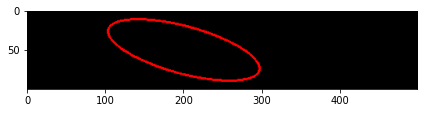

In [25]:
plt.imshow(img)

In [26]:
pts = [(50, 50), (300, 190), (400, 10)]
img = np.zeros((200, 500, 3), np.uint8)
cv2.polylines(img, np.array([pts]), True, RED, 5);

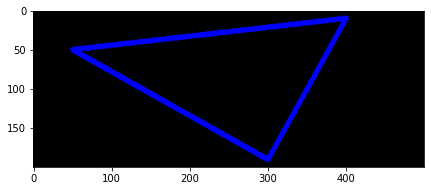

In [27]:
plt.imshow(img)